In [164]:
#Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt

#Read the data
df_pres = pd.read_csv('data/transport_performance.csv', sep=';')
df_mob= pd.read_csv('data/mobiliteit.csv', sep=';')
df_pres.head()

,Modes of travel,Population,Margins,Region characteristics,Periods,Transport performance (billion passenger kilometres )
0,Total,Population 6 years or older,Value,The Netherlands,2018,218.1
1,Total,Population 6 years or older,Value,The Netherlands,2019,218.8
2,Total,Population 6 years or older,Value,The Netherlands,2020,152.0
3,Total,Population 6 years or older,Value,The Netherlands,2021,168.4
4,Total,Population 6 years or older,Value,The Netherlands,2022,186.9


In [165]:
#Initialise prestation data
df_pres['Periods'] = pd.to_numeric(df_pres['Periods'], errors='coerce')
df_pres['Transport performance (billion passenger kilometres )'] = pd.to_numeric(df_pres['Transport performance (billion passenger kilometres )'], errors='coerce')

#Rename columns
df_pres.rename({'Transport performance (billion passenger kilometres )': 'Total travel'}, axis=1, inplace=True)

#Drop unnesecary columns
df_pres.drop('Margins', axis=1, inplace=True)
df_pres.drop('Population', axis=1, inplace=True)

df_pres.head()

,Modes of travel,Region characteristics,Periods,Total travel
0,Total,The Netherlands,2018,218.1
1,Total,The Netherlands,2019,218.8
2,Total,The Netherlands,2020,152.0
3,Total,The Netherlands,2021,168.4
4,Total,The Netherlands,2022,186.9


In [130]:
#Initialise mobility data
df_mob.head()

,Populatie,Geslacht,Persoonskenmerken,Reismotieven,Marges,Perioden,Regio's,Gemiddeld per persoon per jaar/Verplaatsingen (aantal),Gemiddeld per persoon per jaar/Afstand (reizigerskilometers),Gemiddeld per persoon per jaar/Reisduur (uren)
0,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,Totaal personen,Totaal,Waarde,2018,Nederland,1015,13200,453.8
1,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,Totaal personen,Totaal,Waarde,2019,Nederland,989,13140,452.6
2,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,Totaal personen,Totaal,Waarde,2020,Nederland,861,9105,378.0
3,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,Totaal personen,Totaal,Waarde,2021,Nederland,915,9942,424.9
4,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,Totaal personen,Totaal,Waarde,2022,Nederland,984,11027,442.2


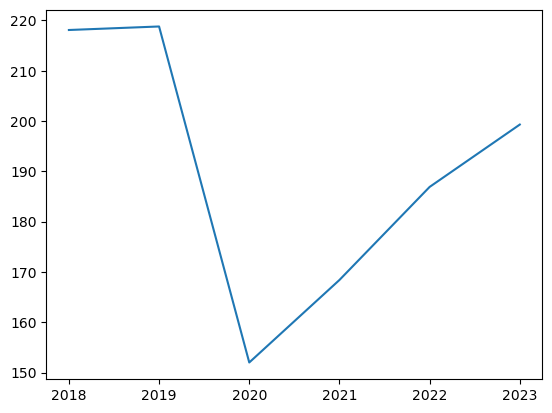

In [ ]:
#Trying out some stuff

data_selected= data_normal[(data_normal['Regio\'s']=='Nederland') & (data_normal['Vervoerwijzen']=='Totaal')]

plt.plot(data_selected['Perioden'], data_selected['Vervoersprestatie (mld reizigerskilometers)'])
plt.show()
